In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


# Applied Machine Learning Final Project

---
# Problem
This project aims to address a supervised binary classification problem aimed at predicting customer churn(Identifying customers who are likely to discontinue their service in the next month)

# Why
The motivation for the project is customer retention. It is significantly more expensive for a company to acquire a new customer than it is to retain an existing one. By accurately predicting who will churn, the business can deploy targeted, proactive retention strategies to maximize customer lifetime value.


# Data
The data set used for this analysis is the Telco Customer churn dataset, sourced from KAGGLE. Link is provided in the README.md

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

(Target) Customers who left within the last month – the column is called Churn </br>
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies</br>
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</br>
Demographic info about customers – gender, age range, and if they have partners and dependents</br>

# Understanding the data
The final target variable is going to be: </br>
**Churn**(Categorical Binary) - Whether the customer churned or not

Customer Attributes:</br>
**gender**(Categorical Binary) - whether customer is male or female [male, female]</br>
**SeniorCitizen**(Binary) - Whether the customer is a senior citizen or not </br>
**Partner**(Categorical Binary) - Whether the customer has a partner or not [yes, no]</br>
**Dependents**(Categorical Binary) - Whether the customer has dependents or not [yes,no] </br>
**tenure**(Integer) - Number of months the customer has stayed with the company </br>
**PhoneService** (Categorical Binary) - Whether the customer has a phone service or not[yes, no] </br>
**MultipleLines**(Categorical) - Whether the customer has multiple lines or not[Yes, No, No phone service]</br>
**InternetService**(Categorical) - Customer's internet service provider(DSL, Fiber optic, No) </br>
**OnlineSecurity**(Categorical)- Whether the customer has online security or not [Yes, No, No internet service] </br>
**OnlineBackup**(Categorical) - Whether the customer has online backup or not[Yes, No, No internet service] </br>
**DeviceProtection**(Categorical) - Whether the customer has device protection or not [Yes, No, No internet service]</br>
**TechSupport**(Categorical) - Whether the customer has tech support or not [Yes, No, No internet service] </br>
**StreamingTV**(Categorical) - Whether the customer has streaming TV or not[Yes, No, No internet service] </br>
**StreamingMovies**(Categorical) - Whether the customer has streaming moves or not[Yes, No, No internet service] </br>
**Contract**(Categorical) - The contract term of the customer [Month-to-month, One year, Two year] </br>
**PaperlessBilling**(Categorical Binary) - Whether the customer has paperless billing or not  </br>
**PaymentMethod**(Categorical) - The customer's payment method [Electronic check, Mailed check, Bank transfer (automatic), Credit card]  </br>
**MonthlyCharges**(Float) - The amount charged to the customer monthly </br>
**TotalCharges** (Float) - The total amount charged to the customer </br>

In [5]:
df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Raw Unfiltered Data: ")
df.head(10)

Raw Unfiltered Data: 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


---
# Data Preparation

In [6]:
print("Current Unfiltered Data Information: ")
df.info()

Current Unfiltered Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pape

**Note:** In the output above, we can pay attention to the right-most columns, where we can see the **Dtype** or data type that the variable is currently being stored in. Some are self-explanatory, like int64(a 64-bit integer); however, most of our columns are stored in the dtype **object**. This data type is a generic container and usually means its stores as strings or has mixed data types. We can also look near the bottom and see how much **memory** our data frame is taking up. In the coming steps we would hope to lower this.

In [7]:
# customerID is anonymous id structure so its more helpful to remove
df.drop("customerID", axis=1, inplace=True)


In [8]:
# Total charges came in as an object to make sure it does not get into our
# category_list we will turn it to numerical while making sure any invalid numbers turn to NA(errors = 'coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Senior Citizen came in as Binary meaning numeric, to make sure we don't miss it
# we can just add to category list
object_cols = df.select_dtypes(include=['object']).columns.tolist()
category_list = object_cols + ['SeniorCitizen']
# Turns our category columns into the Dtype category
for col in category_list:
    df[col] = pd.Categorical(df[col])

**Note:** In this step, we transformed all of our variables that are supposed to be categorical into the actual **categorical variables** data type. This gives the  **semantic correctness** which will prevent invalid mathematical operations, allow us to explore tha data later and generate appropriate graphs such as frequency graphs, and allow  **memory efficiency** and optimization.

In [9]:
# These will downcast our float and integer columns separately
integer_col = df.select_dtypes(include=['int64']).columns.tolist()
float_col = df.select_dtypes(include=['float64']).columns.tolist()

# Using very helpful downcast parameter that will take our numerical value and downcast it to the number of bits that can still represent our data
for col in integer_col:
    df[col] = pd.to_numeric(df[col], downcast='integer')

for col in float_col:
    df[col] = pd.to_numeric(df[col], downcast='float')

**Note:** This last step involved **down casting** our numerical variables to their appropriate bit number that is still able to represent the max number in that specific variable. This allows for more space optimization and our models to run faster.

In [10]:
print("filtered Data Information: ")
df.info()

filtered Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int8    
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 

**Note:** From the information on our filtered data we see our down cast numeric variables and the categorical variables in the correct data type. We also see that our memory usage has dropped significantly which will help with the speed and inefficients of our models.

---
# EDA

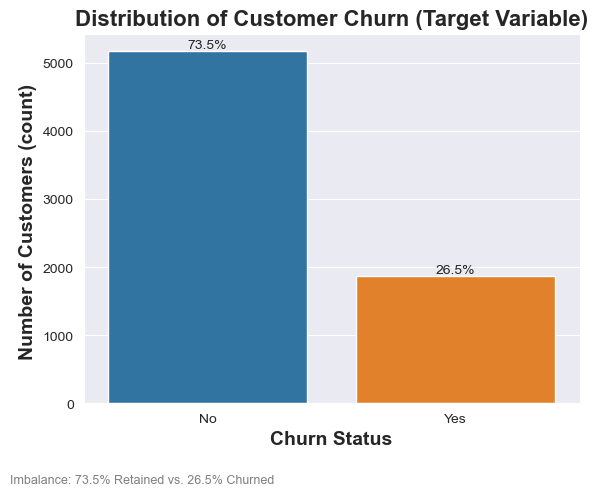

In [11]:
total = len(df)
churn_counts  = df["Churn"].value_counts()
churn_percentages = churn_counts / total * 100

ax = sns.countplot(x="Churn",
                   data=df,
                   order=["No", "Yes"],
                   hue = "Churn",
                   legend = False)

for p in ax.patches:
    percentage = "{:.1f}%".format(p.get_height()/ total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha="center", va="bottom")

plt.title("Distribution of Customer Churn (Target Variable)", fontsize=16, fontweight="bold")
plt.xlabel("Churn Status", fontsize=14, fontweight="bold")
plt.ylabel("Number of Customers (count) ", fontsize=14, fontweight="bold")


plt.figtext(0.01, -0.05, f"Imbalance: {churn_percentages['No']:.1f}% Retained vs. {churn_percentages['Yes']:.1f}% Churned ", fontsize=9, wrap =  True, color = "gray", horizontalalignment = "left", verticalalignment = "center")
plt.show()

 **Note:** There is a large **imbalance** in our **target variable**. This is a problem because a "dumb model" could just learn that saying No would get it a high percentage on accuracy. It will not learn actual patterns and will fail to catch the group we are trying to capture.

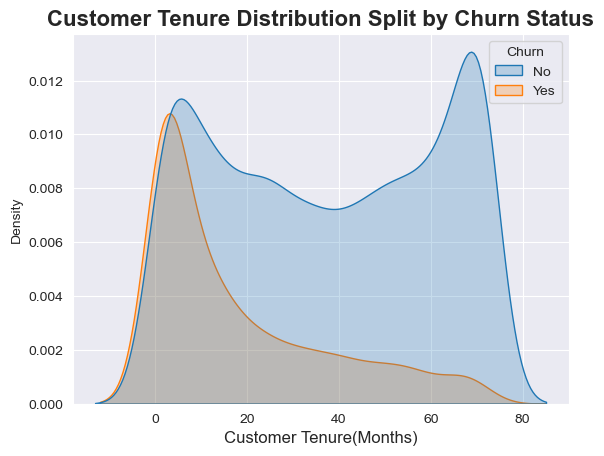

In [15]:
sns.kdeplot(data = df, x = "tenure", hue = "Churn", fill= True )
plt.title("Customer Tenure Distribution Split by Churn Status", fontsize=16, fontweight="bold")
plt.xlabel("Customer Tenure(Months)" , fontsize=12)
plt.show()

**Note:** This **Kernel Density Estimate(KDE) plot** reveals a strong **inverse relationship** and the immense **right-skewness** there exists when it comes to the customer tenure and churn probability. We clearly also can take note of the high Churn Rate during the first couple 0 to 8 Months. We also see that density to Churn drops off dramatically after approximately 18 months. This is an action a company could use as the critical window to retain customers. We also see the stabilization that comes after this that having long-term and loyal customers leads to a significantly lower churn rate.

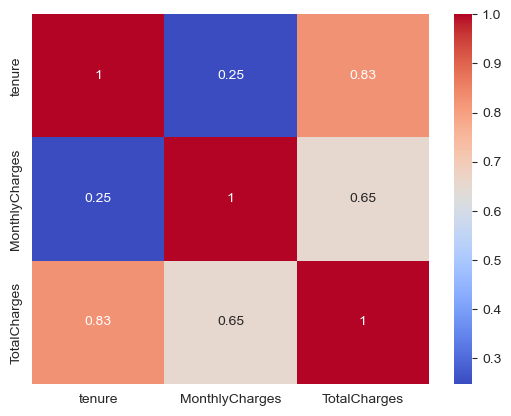

In [17]:
sns.heatmap(df[["tenure", "MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap = "coolwarm")
plt.show()

**Note:** Through this **Heatmap plot** of the correlation between our Numerical Data, we can see how our data correlates with each other. We can see that all are positive relationships. This makes sense since in our scenario, you can't get negative time or negative total charge. One thing that I had to think about for a bit is the fact that Tenure and Total Charge are more correlated than the monthly charge and Total Charge. This makes sense because, as we have seen in prior graphs, a higher monthly rate also means a higher chance of churn. This also plays into how our monthly charge and tenure are the least correlated but still positive. Higher monthly charges mean they are likely not to stay long.

---
# Data Preprocessing

In [ ]:
X = df.drop("Churn", axis=1).copy()
y = df["Churn"].copy()

In [ ]:
category_col = X.select_dtypes(include= "category").columns.tolist()
numerical_cols = X.select_dtypes(include="number").columns.tolist()

preprocessor = ColumnTransformer(transformers=[('numeric',StandardScaler(), numerical_cols), ("categorical", OneHotEncoder(), category_col)])

x_scaled = preprocessor.fit_transform(X)

X = pd.DataFrame(x_scaled, columns = preprocessor.get_feature_names_out())


In [ ]:
y = y.cat.codes

**Note:** This is the process of separating our data between the target variable and the rest of our variables. In this step we also turned our categorical variables into there numerical counterparts. We went ahead with **One Hot Encoding** vs **Label Encoding** of our variables because we do not want the model to assume order between our variables. We also went ahead and **Standardized** our numbers into z-score standardization for some of our models that needed them. Although not all of them need such as our Random Forest since we need it for other models especially our logistic regression we went and standardized all the measurements.

---
# Modeling

**Modeling Methods & Strategy:** The modeling methods I evaluated were **Logistic Regression** , **Random Forest**, and **Neural Nets**. My first plan was to use the baseline of the Logistic Regression, since its a simpler algorithm, and then use Random Forest and Neural Nets to capture more complex separation.

**Hyperparameter Tuning (Grid Search):** To optimize performance , I performed a 10-Fold Stratified Grid Search for each algorithm. This involved training hundreds of model variations to find the optimal combination of hyperparameters:

* Logistic Regression: I tuned the inverse regularization strength (C) to control overfitting and tested different solvers (liblinear,sage ) to handle the L1/L2 penalties. I did have to separate a couple test due to Logistic Regressions sensitivity with compatibility of parameters.

* Random Forest: I varied the number of trees (n_estimators) and strictly tuned max_depth to prevent the trees from memorizing the training data.

* Neural Networks: I experimented with network architecture, neuron counts, and activation functions.

**Model Selection & Justification:** For the final selection, I utilized F1-Macro rather than Accuracy to ensure the model learned even with the unbalanced Target class

The Final Verdict While all three models achieved a near-identical ROC-AUC of ~0.84, Logistic Regression was selected as the final production model.

Stability: In the 10-fold cross-validation, Logistic Regression demonstrated the lowest variance (tightest boxplot distribution). While Random Forest had a higher potential peak, it also exhibited a much wider range of performance, making it a riskier candidate for deployment.

Since the complex models failed to significantly outperform the linear baseline on the AUC metric, I prioritized the simpler, more interpretable model.

Justification of Final Parameters: The winning parameters were {C=0.01, penalty='l2', solver='saga', class_weight='balanced'}.

class_weight='balanced' was the most critical parameter; it mathematically adjusted the loss function to penalize missing a "Churner" more than missing a "Non-Churner," solving the imbalance issue without external sampling.

C=0.01 (High Regularization): This low value indicates that the model needed "strong constraints" to avoid overfitting, likely simplifying the decision boundary to focus only on the strongest signals (like Fiber Optic and Contract type).

---
# Performance Results

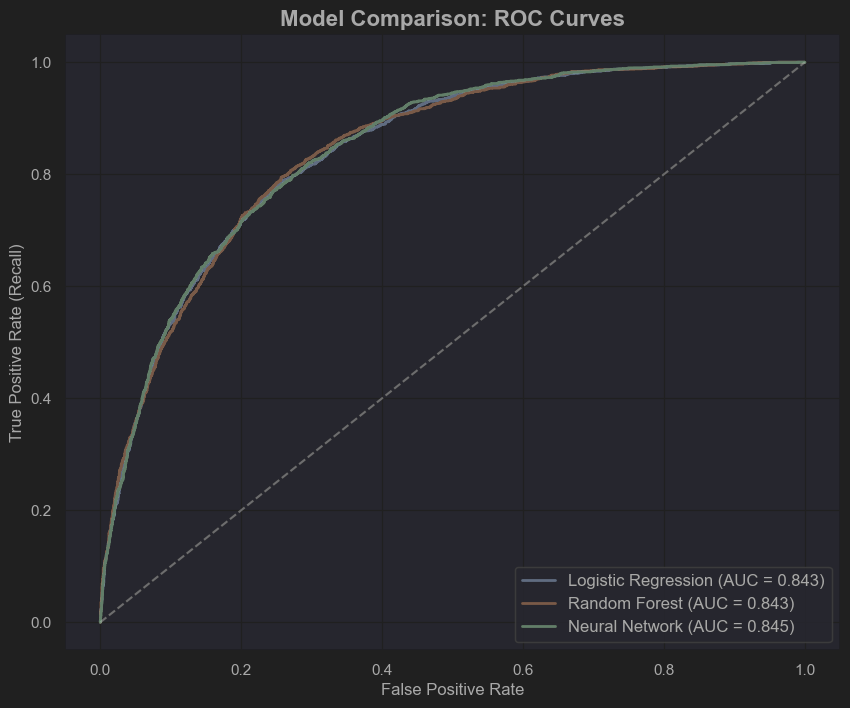

**Note:** The ROC curves for Logistic Regression, Random Forest, and our Neural Network are nearly identical, indicating that each model is extracting the same underlying structure from the data. This suggests performance convergence: the limiting factor is not the choice of algorithm but the information available in the dataset. I believe we need more human behavior information allowing us to predict that human behavior.

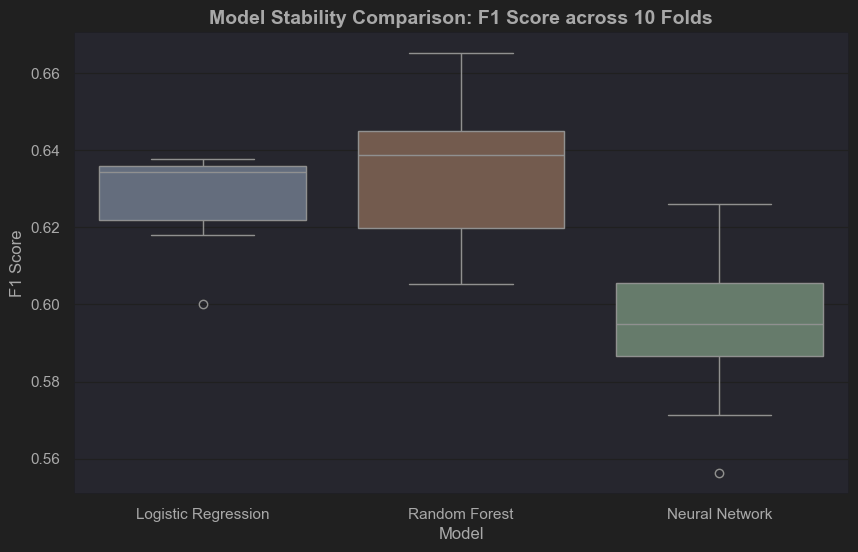




**Note:** Model stability was evaluated by measuring the distribution of F1 scores across 10 cross-validation folds. Violin Plot show both the median performance and variability. A narrower interquartile range (IQR) indicates a more stable model.

From the comparison we can see that our most stable model is the logistic regression with one slight outlier. While the Random Forest is able to get the best median performance, compared to Logistic Regression is not by much. We also see a high range with our Random Forest Model. Even though it does has the best over all performance it seems to have high variance between folds.

---
###### Logistic Regression Classification Matrix

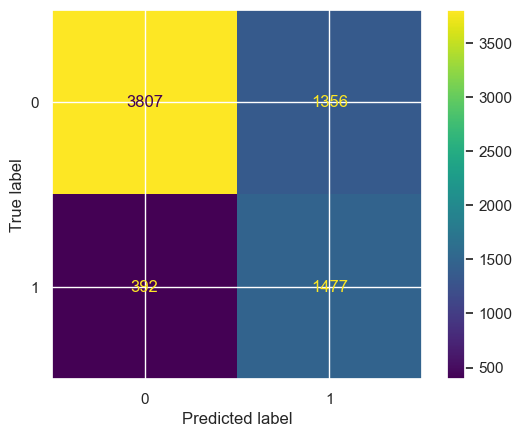
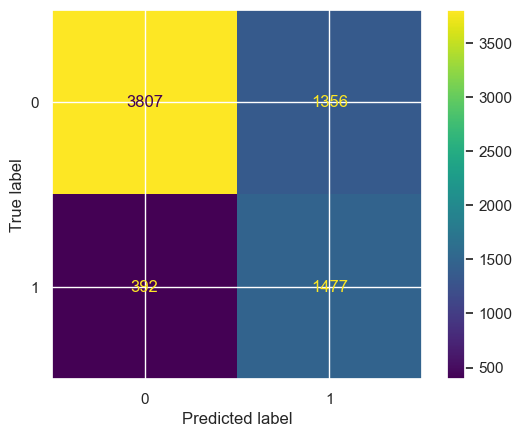

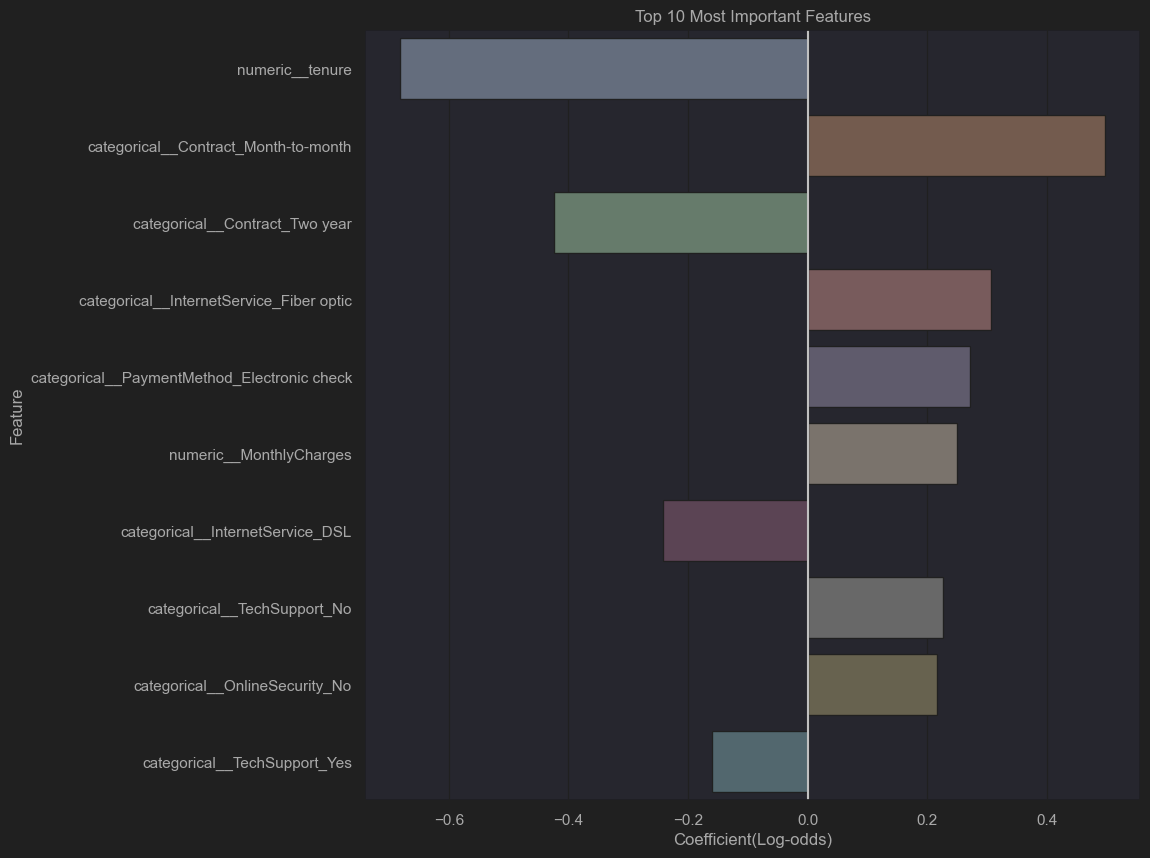

**Note:**
One of the most important advantages of using Logistic Regression is being able to look at it like a white box. This means we can get the feature importance out of the model and make it interpretable. From the Top 10 Most Important Features BoxChart, we can see the top features along with which direction they affect our target variable. From what we can see, the customers who are in a Month-to-month contract type are at most risk of churn. We can also see that the most important feature is Tenure, but in a direction that helps keep customers from churning.

---
# Discussion

Challenges:
* The main and biggest challenge I had was that the data was imbalanced. This was always something I had to keep in mind and check for when running my modeling.

* During Modeling, I really wanted one of the more complex models to work. My original thought was that Random Forest was going to be the outperforming model. The separation line, however, ended up being a lot more linear than I expected. This is in part due to our data, which in hindsight, our columns mostly have a linear relationship.

* The time it took to do my GridSearch Hyperparameter tuning also caused some problems. Before I could want to get started and initialize my Jupyter Labs, I would have to wait at least an hour for my complete Modeling.ipynb to finish. This just made it very annoying to start and then have to wait before I can continue my modeling phase.

* This data seems to be my bottleneck. Since all of our ROC curves came out to roughly the same AUC Number, I can deduce that our choice should not come down to the type of model; instead, there has to be a change in our data if we want to get a better score. I believe more Human centered variables would be in.

* Choosing Logistic Regression ave me a significant advantage in Explainability. This is something I wish I could have explored more. With more time I would have wanted to find out just how much one feature is important compared to another.



---
# Conclusions

This project set out to build a predictive classification model to identify telecommunication customers at risk of churning. This project has been eye-opening in my path to a career and has peaked my interest into this field and study.

With meticulous hyperparameter tuning of Random Forest, Logistic Regression, and Neural Nets we reach a Ceiling of the current dataset since all of our models converged to a certain AUC number. We were able to select our final production model which was Logistic Regression mostly due to its stability and interpretability.

We were then able to interpret the final results and bring a project that is convincing and able to be improved upon.